## Easy

2E1.
$ Pr(rain|Monday)$

2E2.
The probability that it is Monday, given that it is raining.

2E3.
$ Pr(Monday|rain) $

$ Pr(rain|Monday)Pr(Monday)/Pr(rain) $

## Medium

2M1. Recall the globe tossing model from the chapter. Compute and plot the grid approximate posterior distribution for each of the following sets of observations. In each case, assume a uniform prior for p.

(1) W,W,W

(2) W,W,W,L

(3) L,W,W,L,W,W,W

In [8]:
#Config
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import scipy.stats as stats

In [9]:
def posterior_grid_approx(grid_points, success, tosses):
    # Define the grid
    grid = np.linspace(0, 1, grid_points)
    
    # Define the prior
    prior = np.repeat(5, grid_points)
    
    # Compute the likelihood at each parameter value
    likelihood = stats.binom.pmf(success, tosses, grid)
  
    # Compute the unstandardized posterior at each parameter value
    un_posterior = prior * likelihood
    
    # Standardize the posterior 
    posterior = un_posterior/un_posterior.sum()
    return grid, posterior

def plot_grid_approx(points, grid, w, n):
    _, ax = plt.subplots(1, 2, figsize=(12, 5))
    for idx, ps in enumerate(points):
        grid, posterior = posterior_grid_approx(ps, w, n)
        ax[idx].plot(grid, posterior, "o-", label=f"successes = {w}\ntosses = {n}")
        ax[idx].set_xlabel("probability of water")
        ax[idx].set_ylabel("posterior probability")
        ax[idx].set_title(f"{ps} points")
        ax[idx].legend(loc=0)

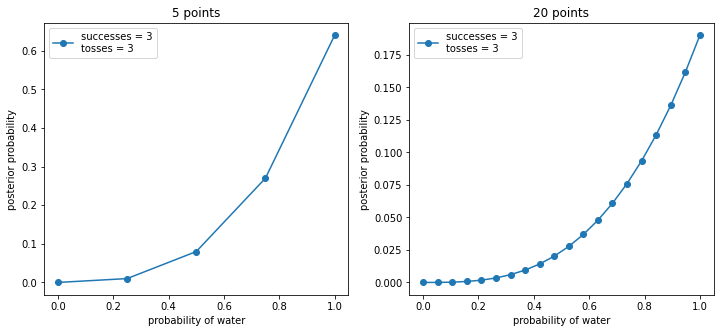

In [10]:
#1. W W W
plot_grid_approx((5, 20), 1000, 3, 3)

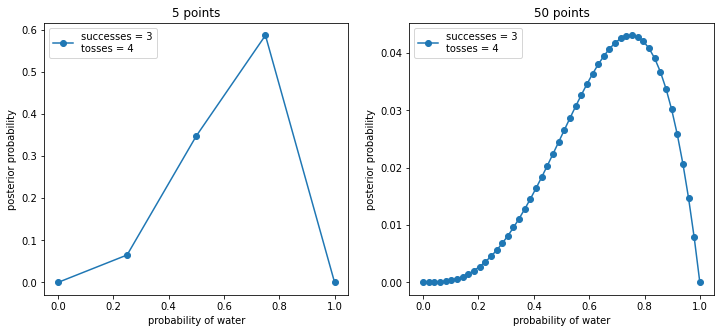

In [11]:
#2. W W W L
plot_grid_approx((5, 50), 1000, 3, 4)

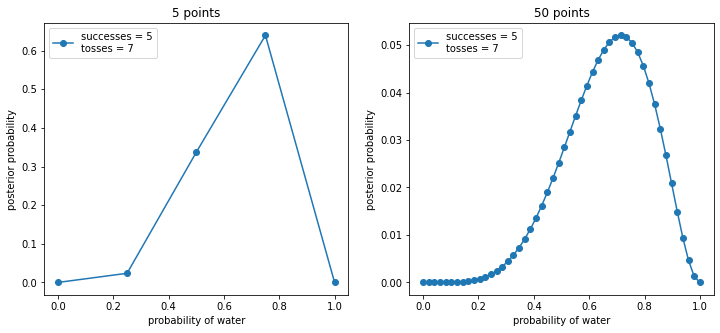

In [12]:
#2. L W W L W W W
plot_grid_approx((5, 50), 1000, 5, 7)

2M2. Now assume a prior for p that is equal to zero when p < 0.5 and is a positive constant when p ≥ 0.5. Again compute and plot the grid approximate posterior distribution for each of the sets of observations in the problem just above.

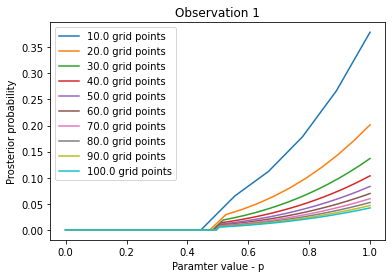

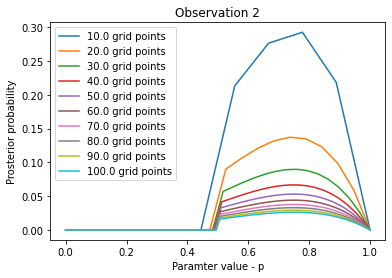

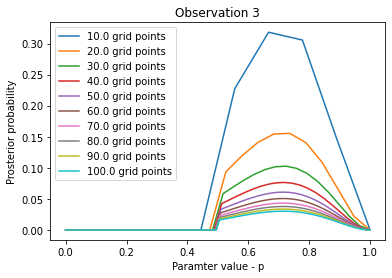

In [13]:
# express the above scenarios as the number of waters in each
W = np.array([3, 3, 5])
# give the total number of trials
Total = np.array([3, 4, 7])

# Get the plots for each scenario, trying different numbers of grid points for each
for i, j, k in zip(W, Total, range(3)):
    for n in np.linspace(10, 100, 10):
        # get the grid of parameter values
        p = np.linspace(0, 1, int(n))
        # compute the likelihood for each value of p, assuming 6 success and 3 fails
        likelihood = stats.binom.pmf(k=i, n=j, p=p)
        # prior is step function
        prior = np.heaviside(p - 0.5, 0.5) * 7
        # posterior
        post = likelihood * prior
        # normalise the posterior
        post = post / np.sum(post)
        plt.plot(p, post, label=str(n) + " grid points")

    plt.title("Observation " + str(k + 1))
    plt.xlabel("Paramter value - p")
    plt.ylabel("Prosterior probability")
    plt.legend()
    plt.show()

2M3.
Suppose there are two globes, one for Earth and one for Mars. The Earth globe is 70% covered in water. The Mars globe is 100% land. Further suppose that one of these globes—you don’t know which—was tossed in the air and produced a “land” observation. Assume that each globe was equally likely to be tossed. Show that the posterior probability that the globe was the Earth, conditional on seeing “land” (Pr(Earth|land)), is 0.23.

$$
Pr(Earth) = Pr(Mars) = 0.5 \\
Pr(Land|Earth) = 0.3 \\
Pr(Land|Mars) = 1 \\
$$

$$
\begin{align}
Pr(Earth|Land) & = 0.23 \\
Pr(Earth|Land) & = \frac{Pr(Land|Earth)*Pr(Earth)}{Pr(Land)} \\
Pr(Earth|Land) & = \frac{Pr(Land|Earth)*Pr(Earth)}{Pr(Land|Earth)Pr(Earth) + Pr(Land|Mars)Pr(Mars)} \\
Pr(Earth|Land) & = \frac{Pr(Land|Earth)*0.5}{Pr(Land|Earth)0.5 + Pr(Land|Mars)0.5} \\
Pr(Earth|Land) & = \frac{Pr(Land|Earth)}{Pr(Land|Earth) + Pr(Land|Mars)} \\
Pr(Earth|Land) & = \frac{0.3}{0.3 + 1} \\
Pr(Earth|Land) & = 0.23 \\
\end{align}
$$

2M4.
Suppose you have a deck with only three cards. Each card has two sides, and each side is either black or white. One card has two black sides. The second card has one black and one white side. The third card has two white sides. Now suppose all three cards are placed in a bag and shuffled. Someone reaches into the bag and pulls out a card and places it flat on a table. A black side is shown facing up, but you don’t know the color of the side facing down. Show that the probability that the other side is also black is 2/3. Use the counting method (Section 2 of the chapter) to approach this problem. This means counting up the ways that each card could produce the observed data (a black side facing up on the table).


$$ deck = 3Cs $$
$$ C1 = 2Bs $$
$$ C2 = 1B, 1W $$
$$ C3 = 2Ws $$

$$
\begin{aligned}
P(B_{2}|B_{1}) & = \frac{Pr(B_{1}|B_{2})Pr(B_{2})}{Pr(B_{1})} \\
P(B_{1}) & = \frac{1 * \frac{1}{3}}{\frac{1}{2}} \\
P(B_{1}) & = \frac{2}{3} \\
\end{aligned}
$$

#### Counting Method

Step 0: Problem:
- 1 bag with 3 cards, each card 2 sides, each side could be black and white

Step 1: List possible outcomes
1) B B
2) W B
3) B W
4) W W

Step 2: Count the number of ways we can pick a BLACK side, 
1) B B = 2
2) W B = 1
3) B W = 1
4) W W = 0

Step 2: Count the number of ways we can pick a BLACK side, with the other side also black
1) B B = 2
2) W B = 0
3) B W = 0
4) W W = 0

????????

2M5. Now suppose there are four cards: B/B, B/W, W/W, and another B/B. Again suppose a card is drawn from the bag and a black side appears face up. Again calculate the probability that the other side is black.

$$
\begin{aligned}
P(B_{2}|B_{1}) & = \frac{Pr(B_{1}|B_{2})Pr(B_{2})}{Pr(B_{1})} \\
P(B_{1}) & = \frac{1 * \frac{2}{4}}{\frac{5}{8}} \\
P(B_{1}) & = \frac{4}{5} \\
\end{aligned}
$$

2M6. Imagine that black ink is heavy, and so cards with black sides are heavier than cards with white sides. As a result, it’s less likely that a card with black sides is pulled from the bag. So again assume there are three cards: B/B, B/W, and W/W. After experimenting a number of times, you conclude that for every way to pull the B/B card from the bag, there are 2 ways to pull the B/W card and 3 ways to pull the W/W card. Again suppose that a card is pulled and a black side appears face up. Show that the probability the other side is black is now 0.5. Use the counting method, as before.

$ Pr(B/B) = \frac{1}{1+2+3} $

$ Pr(B/W) = \frac{2}{1+2+3} $

$ Pr(W/W) = \frac{3}{1+2+3} $

$$
\begin{aligned}
P(B_{2}|B_{1}) & = \frac{Pr(B_{1}|B_{2})Pr(B_{2})}{Pr(B_{1})} \\
\end{aligned}
$$

$$
\begin{aligned}
P(B_{2}|B_{1}) & = \frac{Pr(B_{1}|B_{2})Pr(B_{2})}{Pr(B_{1})} \\
P(B_{1}) & = \frac{1*\frac{1}{6}}{(2*\frac{1}{6} + (1*\frac{1}{2})} \\
P(B_{1}) & = \frac{1}{5} \\
\end{aligned}
$$
????
Correct Answer:

$$
\begin{aligned}
P(B_{2}|B_{1}) & = \frac{Pr(B_{1}|B_{2})Pr(B_{2})}{Pr(B_{1})} \\
P(B_{1}) & = \frac{1*\frac{1}{6}}{(1*\frac{1}{6} + (\frac{1}{2}*\frac{2}{6}) + (0*\frac{1}{2}} \\
P(B_{1}) & = \frac{\frac{1}{6}}{\frac{1}{3}} \\
P(B_{1}) & = \frac{1}{2} \\
\end{aligned}
$$

### Hard

2H1. Suppose there are two species of panda bear. Both are equally common in the wild and live in the same places. They look exactly alike and eat the same food, and there is yet no genetic assay capable of telling them apart. They differ however in their family sizes. Species A gives birth to twins 10% of the time, otherwise birthing a single infant. Species B births twins 20% of the time, otherwise birthing singleton infants. Assume these numbers are known with certainty, from many years of field research. Now suppose you are managing a captive panda breeding program. You have a new female panda of unknown species, and she has just given birth to twins. What is the probability that her next birth will also be twins?

'Equally common and live in the same places' = P(pA) = P(pB) = 0.5?

P(pA_twins) = 0.1
P(pB_twins) = 0.2

"What is the probability that the second set of infant will be twins, given that first one is a twin"

$$
\begin{aligned}
P(Twin_{2}|Twin_{1}) = \frac{P(Twin_{1}|P(Twin_{2})*P(Twin_{2})}{P(Twin_{1})}
\end{aligned}
$$

$$
\begin{aligned}
P(Twin_{1}) & = 0.5 * 0.1 + 0.5 * 0.2 \\
P(Twin_{1}) & = 0.15
\end{aligned}
$$


Solution:

Let $ T_{1} $ denote the first offspring were Twins. Let A and B denote the panda from species A and B respectiveily.

$ Pr(A|T_{1}) = \frac{Pr(T_{1}|A)Pr(A)}{Pr(T_{1})} = \frac{Pr(T_{1}|A)Pr(A)}{Pr(T_{1}|A)*Pr(A) + Pr(T_{1}|B)*Pr(B)} = \frac{Pr(T_{1}|A)Pr(A)}{Pr(T_{1})} = \frac{Pr(T_{1}|A)Pr(A)}{Pr(T_{1}|A)*Pr(A) + Pr(T_{1}|B)*Pr(B)} = \frac{Pr(T_{1}|A)}{Pr(T_{1}|A) + Pr(T_{1}|B)} = \frac{0.1}{0.1 + 0.2} = \frac{1}{3} $

$ Pr(B|T_{1}) = 1 - Pr(A|T_{1}) = \frac{2}{3} $

$ Pr(T_{2}|T_{1}) = Pr(T_{2}|A, T_{1})Pr(A|T_{1}) + Pr(T_{2}|B, T_{1})Pr(B|T_{1}) = 0.1 * \frac{1}{3} + 0.2 * \frac{2}{3} = \frac{1}{6} $

2H3.
Continuing on from the previous problem, suppose the same panda mother has a second birth and that it is not twins, but a singleton infant. Compute the posterior probability that this panda is species A

$ Pr(A|I) = \frac{Pr(I|A)Pr(A)}{Pr(I)} = \frac{Pr(I|A)Pr(A)}{Pr(I|A)*Pr(A) + Pr(I|B)*Pr(B)} = \frac{Pr(I|A)}{Pr(I|A) + Pr(I|B)} = \frac{0.9}{0.9 + 0.8} = \frac{9}{17} $

Close! Needed to have the conditional that first birth is twins...

Actual answer/solution:

$ Pr(A|I, T_{1}) = \frac{Pr(I, T_{1}|A)Pr(A)}{Pr(I, T_{1}|A)Pr(A) + Pr(I, T_{1}|B)Pr(B)} = \frac{Pr(I|A)}{Pr(I, T_{1}|A) + Pr(I, T_{1}|B)} = \frac{0.1* 0.9}{0.9*0.1 + 0.8*0.2} = 0.36 $